In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [29]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
# Declare a Base using `automap_base()`
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [9]:
# Display the row's columns and data in dictionary format
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fbc4bef8640>,
 'prcp': 0.08,
 'date': '2010-01-01',
 'id': 1,
 'tobs': 65.0,
 'station': 'USC00519397'}

In [10]:
# Display the row's columns and data in dictionary format
first_row = session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fbc4bef8e20>,
 'id': 1,
 'latitude': 21.2716,
 'longitude': -157.8168,
 'elevation': 3.0,
 'station': 'USC00519397',
 'name': 'WAIKIKI 717.2, HI US'}

# Exploratory Precipitation Analysis

In [89]:
# Find the most recent date in the data set.
most_recent = session.query(Measurement.date).order_by(Measurement.date.desc()).first().date
most_recent 

'2017-08-23'

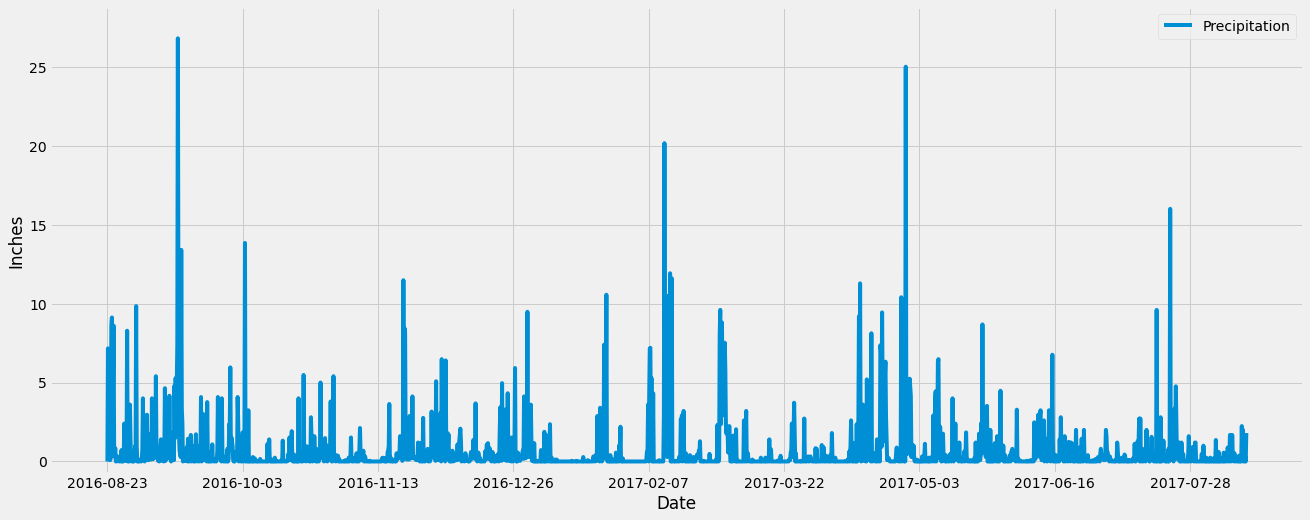

<Figure size 432x288 with 0 Axes>

In [172]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
start_date = dt.date(2017, 8, 23) - dt.timedelta(days = 365)

# Perform a query to retrieve the data and precipitation scores
#engine.execute("SELECT * FROM measurement WHERE date >= '2016-08-23'").fetchall()
results = session.query(Measurement.prcp, Measurement.date).\
    filter(Measurement.date >= start_date).all()


# Save the query results as a Pandas DataFrame and set the index to the date column
prec_rows = [{"Date": result[1], "PRCP": result[0]} for result in results]
prec_rows

pd.DataFrame(prec_rows).set_index("Date")
results_df = results_df.rename(columns = {"PRCP" : "Precipitation"})

# Sort the dataframe by date
results_df = results_df.sort_values("Date")
# results_df = results_df.dropna(how = "any")
results_df

# Use Pandas Plotting with Matplotlib to plot the data
tick_locations = np.arange(0, len(results_df), 240)

results_df.plot(figsize = (20, 8), xticks = tick_locations)
plt.ylim(-.75, max(results_df["Precipitation"]) + 2)
plt.ylabel("Inches")
plt.show()
plt.tight_layout()


In [154]:
# Use Pandas to calcualte the summary statistics for the precipitation data
results_df.describe()

,Precipitation
count,2021.000000
mean,0.709114
std,1.844758
min,0.000000
25%,0.000000
50%,0.080000
75%,0.520000
max,26.800000


# Exploratory Station Analysis

In [155]:
# Design a query to calculate the total number stations in the dataset
engine.execute("SELECT COUNT(DISTINCT(station)) FROM station").fetchall()

[(9,)]

In [156]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
engine.execute("SELECT station, count(*) FROM measurement GROUP BY station ORDER BY COUNT(*) DESC").fetchall()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [157]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
engine.execute("SELECT MIN(tobs), MAX(tobs), AVG(tobs) FROM measurement WHERE station = 'USC00519281'").fetchall()

[(54.0, 85.0, 71.66378066378067)]

<AxesSubplot:ylabel='Frequency'>

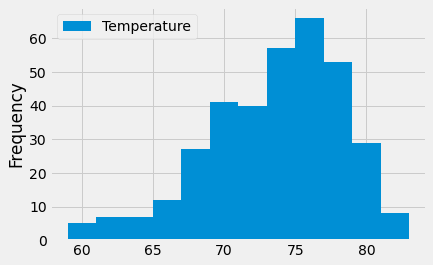

In [168]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
engine.execute("SELECT * FROM measurement WHERE date >= '2016-08-23'").fetchall()
results = session.query(Measurement.tobs, Measurement.date).\
    filter(Measurement.date >= start_date).filter(Measurement.station == 'USC00519281').all()

tobs_rows = [{"Date": result[1], "Temperature": result[0]} for result in results]
tobs_rows

tobs_df = pd.DataFrame(tobs_rows)
tobs_df.plot.hist(bins = 12)


# Close session

In [169]:
# Close Session
session.close()